## Pipelines

Un "Pipeline" se refiere a la serie de algoritmos encadenados que permiten procesar el flujo de datos, desde la entrada hasta la salida, para que alimenten un algoritmo. 

Ahora bien, lo que se quiere es que este flujo de datos puedan utilizar las GPU de forma eficiente, esto es deseable particularmente en los casos en los que el volumen de datos supera la memoria que tenemos disponible, y se requiere trabajar por lotes de datos a demanda que mantengan el procesamiento al máximo, para logar esto utilizamos los Pipeline.   

En este caso trabajamops con el API de TensorFlow, que permite construir Pipelines optimizados.

En mi caso trabajare con 1697 extractos de sonidos de 32 especies de mamiferos marinos en el diferentes localizaciones geográficas en el mundo.

Sobre estos datos:
1. Crear un dataset y sus Labels
2. Utilizar Dataset.map() para crear un dataset con [Audios, Labels]
3. Escribir una funcion de análisis que cargue y decodifique los archivos mp4 a partir de las rutas de los archivos

In [82]:
import tensorflow as tf
import pathlib
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display

In [50]:
Mammals = tf.data.Dataset.list_files("drive/MyDrive/Cetaceos/Audios/*.mp4")
for element in Mammals:
  print(element)

tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Bearded Seal35.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/White-beaked Dolphin25.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Narwhal45.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Rough-Toothed Dolphin47.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Melon Headed Whale3.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Sperm Whale31.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Atlantic Spotted Dolphin46.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/White-sided Dolphin49.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Grampus, Risso_s Dolphin46.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Leopard Seal7.mp4', shape=(), dtype=string)
tf.Tensor(b'drive/MyDrive/Cetaceos/Audios/Clymene Dolphin40.mp4', shape=(), dtype=st

In [83]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-1]
  return tf.io.read_file(file_path), label

labeled_ds = Mammals.map(process_path)
path_ds='drive/MyDrive/Cetaceos/Audios/'

for sound_mp4, label_text in labeled_ds.take(1):
  path_sound=path_ds + str(label_text.numpy()) 
  file_name= path_sound.replace(u"b'", u'')
  file_name= file_name.replace(u"'", u'')
  print(repr(sound_mp4.numpy()[:100]))
  print(path_ds)
  print(label_text.numpy())
  print(file_name)

b'RIFF\xf4(\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\xc0>\x01\x00\x80}\x02\x00\x02\x00\x10\x00data\xd0(\x04\x00P\x01P\x02\x10\x01\x80\x01\xe0\x01\xe0\x00\x80\x01 \x01 \x01\xb0\x01\xe0\x00p\x01@\x01\xf0\x00\xf0\x01\xf0\x000\x01`\x01\x00\x01`\x01\xf0\x000\x01\xb0\x01\xe0\x00p\x01P\x01\x00\x01\xe0\x01'
drive/MyDrive/Cetaceos/Audios/
b'Striped Dolphin64.mp4'
drive/MyDrive/Cetaceos/Audios/Striped Dolphin64.mp4


(36830,)
22050


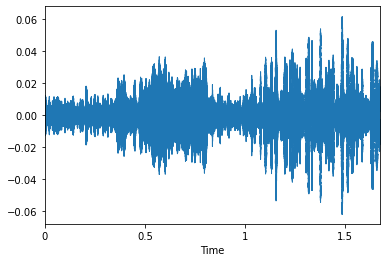

In [84]:
data, sampling_rate=librosa.load(file_name)
print(data.shape)
print(sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)